# Key papers

This Jupyter Notebook can be used to perform basic publication analysis for a science branch. 

**Features:**

1. Subtopic analysis based on co-citation graph clustering:
    * Chord diagram for co-citation graph
    * Comparison of subtopics by size
    * Timeline of each subtopic
    * Extraction of 1,2,3-grams describing each subtopic
2. Detection of highlight papers:
    * Top cited papers overall
    * Detection of most cited papers for each year
    * Detection of papers with max relative citation gain for each year
3. Citation dynamics visualization for highlight papers
4. Subtopic evolution tracking based on co-citation graph clustering for different time periods

## Getting Started

1. Define the `SEARCH_TERMS` variable in the cell below with a list of keywords that describe the science branch of your interest.
2. Run all cells & see the results.

In [1]:
SEARCH_TERMS = ['brain', 'computer', 'interface']

## Publication Analysis

In [2]:
import logging

from bokeh.plotting import show, output_notebook
from matplotlib import pyplot as plt

from keypaper.analysis import KeyPaperAnalyzer
from keypaper.visualization import Plotter

logging.basicConfig(level=logging.DEBUG, format='%(asctime)s %(levelname)s: %(message)s')
output_notebook()
%matplotlib inline

[nltk_data] Downloading package stopwords to /Users/oleg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/oleg/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/oleg/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/oleg/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Loading BokehJS ...

2019-05-15 19:11:19,954 DEBUG: Loaded backend module://ipykernel.pylab.backend_inline version unknown.
2019-05-15 19:11:19,963 DEBUG: Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [3]:
analyzer = KeyPaperAnalyzer()
analyzer.launch(*SEARCH_TERMS)

TODO: handle queries which return more than 1000000 items
TODO: use local database instead of PubMed API


2019-05-15 19:11:21,380 INFO: Found 7415 articles about ('brain', 'computer', 'interface')
2019-05-15 19:11:21,381 INFO: Loading publication data
2019-05-15 19:11:21,387 INFO: Creating pmids table for request with index.
2019-05-15 19:11:23,352 INFO: Found 7326 publications in the local database

2019-05-15 19:11:23,353 INFO: Started loading citation stats
2019-05-15 19:11:53,321 INFO: Done loading citation stats
2019-05-15 19:11:53,369 INFO: Loaded citation stats for 5354 of 7415 articles. Others may either have zero citations or be absent in the local database.
2019-05-15 19:11:53,378 INFO: 5307 articles are further analyzed

2019-05-15 19:11:53,379 INFO: Calculating co-citations for selected articles
2019-05-15 19:12:00,779 INFO: Loaded 8817 lines of citing info
2019-05-15 19:12:00,780 INFO: Found 432264 co-cited pairs of articles
2019-05-15 19:12:00,781 INFO: Aggregating co-citations
2019-05-15 19:12:01,741 INFO: Filtering top 10000 or 80% of all the co-citations
2019-05-15 19:12:0

In [4]:
plotter = Plotter(analyzer)

## Subtopics a.k.a. Clusters in the Co-citation Graph

In [5]:
show(plotter.chord_diagram_components())

2019-05-15 19:12:22,795 INFO: Visualizing components with Chord diagram


In [6]:
show(plotter.component_size_summary())

2019-05-15 19:12:24,635 INFO: Summary component detailed info visualization


In [7]:
for p in plotter.subtopic_timeline_graphs():
    show(p)

2019-05-15 19:12:25,232 INFO: Per component detailed info visualization


## Top Cited Papers Overall

In [8]:
show(plotter.top_cited_papers())

## Top Cited Papers for Each Year

In [9]:
show(plotter.max_gain_papers())

2019-05-15 19:12:26,105 INFO: Different colors encode different papers


## Top by Relative Gain for Each Year

In [10]:
show(plotter.max_relative_gain_papers())

2019-05-15 19:12:26,213 INFO: Top papers in relative gain for each year
2019-05-15 19:12:26,214 INFO: Relative gain (year) = Citation Gain (year) / Citations before year
2019-05-15 19:12:26,216 INFO: Different colors encode different papers


## Citation per Year Dynamics

In [11]:
plotter.article_citation_dynamics()

2019-05-15 19:12:26,333 INFO: Choose ID to get detailed citations timeline for top cited / max gain or relative gain papers


## Component Evolution

2019-05-15 19:12:31,952 DEBUG: update_title_pos
2019-05-15 19:12:31,963 DEBUG: findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/Users/oleg/miniconda2/envs/pubtrends/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.
2019-05-15 19:12:32,861 DEBUG: update_title_pos
2019-05-15 19:12:33,519 DEBUG: update_title_pos
2019-05-15 19:12:33,923 DEBUG: update_title_pos


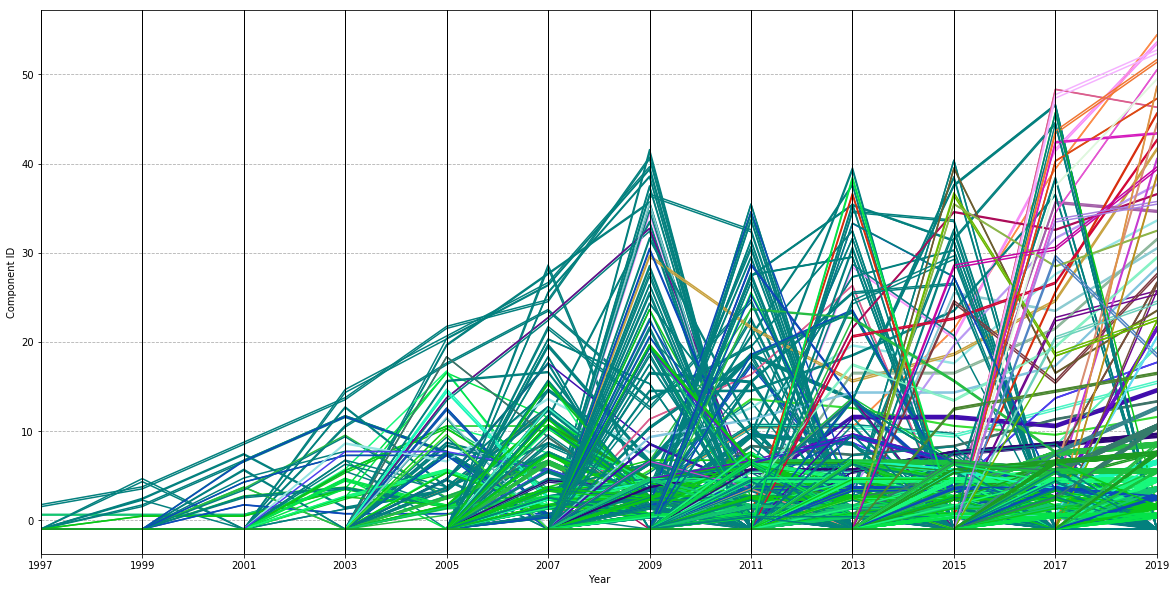

In [12]:
plt = plotter.subtopic_evolution()
plt.show()